## Lorenz Attractor using Predictor-Corrector

In [1]:
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [2]:
"""Compute the time-derivative of a Lorenz system."""
def xt(x, y, z, t):
    return (sigma*(y - x))

def yt(x, y, z, t):
    return (rho*x - y - x*z)

def zt(x, y, z, t):
    return (-1*(beta*z) + x*y)

In [3]:
# choose a different color for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, 10))
def lorenz_ode_plot_components (x, y, z):
    plt.figure (figsize = (8.5,8.5))
    plt.plot ( t, x, linewidth = 1, color = 'b' ) 
    plt.plot ( t, y, linewidth = 1, color = 'r' )
    plt.plot ( t, z, linewidth = 1, color = 'g' )
    plt.grid ( True )
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- x(t), y(t), z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )
    
    plt.legend(['x','y','z'], loc = 2)
    plt.savefig ( 'lorenz_ode_components.png' )
    plt.show ( )
    return 

def lorenz_ode_plot_3d (x, y, z):
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.gca ( projection = '3d' )
    ax.plot ( x, y, z, linewidth = 0.5, color = 'r' )
    ax.grid ( True )
    ax.set_xlabel ( '<--- x(t) --->' )
    ax.set_ylabel ( '<--- y(t) --->' )
    ax.set_zlabel ( '<--- z(t) --->' )
    ax.set_title ( 'Lorenz 3D Plot' )
    
    plt.savefig ( 'lorenz_ode_3d.png' )
    plt.show ( )
    return

In [6]:
def RungeKutta4(xt,yt,zt,n = 3500, T = 35):
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    t = np.zeros(n+1)
    
    x[0] = 8.0
    y[0] = 1.0
    z[0] = 1.0
    t[0] = 0
    dt = T/float(n) #0.01
    
    #Compute the approximate solution at equally spaced times.
    for k in range (n):
    
        t[k+1] = t[k] + dt
        
        k1 = xt(x[k], y[k], z[k], t[k])
        l1 = yt(x[k], y[k], z[k], t[k])
        m1 = zt(x[k], y[k], z[k], t[k])

        k2 = xt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        l2 = yt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        m2 = zt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))

        k3 = xt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        l3 = yt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        m3 = zt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))

        k4 = xt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        l4 = yt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        m4 = zt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))

        x[k+1] = x[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y[k+1] = y[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z[k+1] = z[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

    return x, y, z, t

In [7]:
def PredictorCorrector(xt, yt, zt,n = 3500, T = 35):
    x = np.zeros(n+2)
    y = np.zeros(n+2)
    z = np.zeros(n+2)
    t = np.zeros(n+2)
    
    x[0] = 8.0
    y[0] = 1.0
    z[0] = 1.0
    t[0] = 0
    dt = T/float(n) #0.01
    
    x, y, z, t = RungeKutta4(xt, yt, zt)
    
    f0_dx = xt(x[0],y[0],z[0],t[0])
    f0_dy = yt(x[0],y[0],z[0],t[0])
    f0_dz = zt(x[0],y[0],z[0],t[0])
    
    f1_dx = xt(x[1],y[1],z[1],t[1])
    f1_dy = yt(x[1],y[1],z[1],t[1])
    f1_dz = zt(x[1],y[1],z[1],t[1])
    
    f2_dx = xt(x[2],y[2],z[2],t[2])
    f2_dy = yt(x[2],y[2],z[2],t[2])
    f2_dz = zt(x[2],y[2],z[2],t[2])
    
    f3_dx = xt(x[3],y[3],z[3],t[3])
    f3_dy = yt(x[3],y[3],z[3],t[3]) 
    f3_dz = zt(x[3],y[3],z[3],t[3])
    
    for k in range(n-1,0,-1):
        #Predictor: The fourth-order Adams-Bashforth technique, an explicit four-step method:
        x[k+1] = x[k] + (dt/24) *(55*f3_dx - 59*f2_dx + 37*f1_dx - 9*f0_dx)
        y[k+1] = y[k] + (dt/24) *(55*f3_dy - 59*f2_dy + 37*f1_dy - 9*f0_dy)
        z[k+1] = z[k] + (dt/24) *(55*f3_dz - 59*f2_dz + 37*f1_dz - 9*f0_dz)
        
        f4_dx = xt(x[k+1],y[k+1],z[k+1],t[k+1])
        f4_dy = yt(x[k+1],y[k+1],z[k+1],t[k+1])
        f4_dz = zt(x[k+1],y[k+1],z[k+1],t[k+1])
        
        #Corrector: The fourth-order Adams-Moulton technique, an implicit three-step method:              
        x[k+1] = x[k] + (dt/24) *(9*xt(x[k+1],y[k+1],z[k+1],t[k+1]) + 19*f3_dx - 5*f2_dx + f1_dx)
        y[k+1] = y[k] + (dt/24) *(9*yt(x[k+1],y[k+1],z[k+1],t[k+1]) + 19*f3_dy - 5*f2_dx + f1_dy)
        z[k+1] = z[k] + (dt/24) *(9*yt(x[k+1],y[k+1],z[k+1],t[k+1]) + 19*f3_dz - 5*f2_dx + f1_dz)
    
    return x, y, z, t

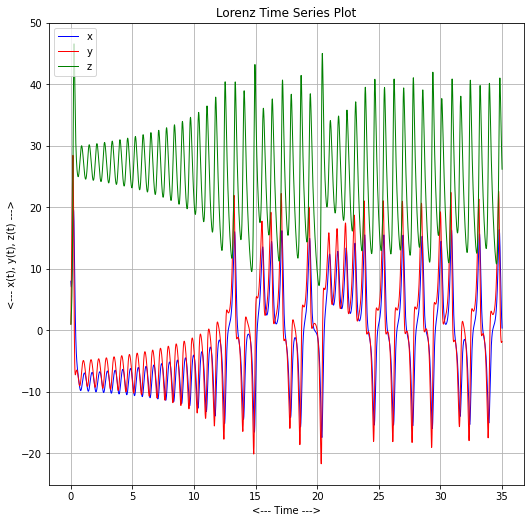

/tmp/ipykernel_13606/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


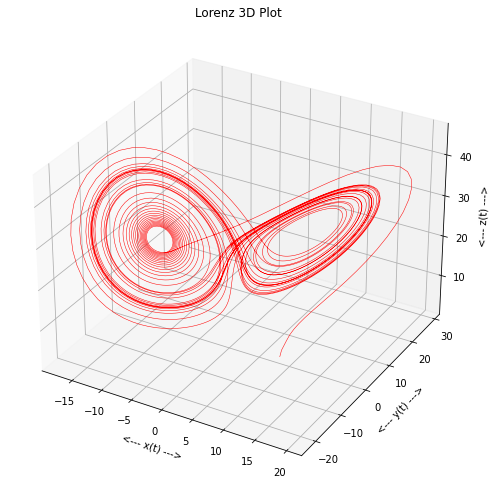

In [8]:
""" Initial values unchanged """
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

### PLOTS Adams-Bashfort-Moulton:

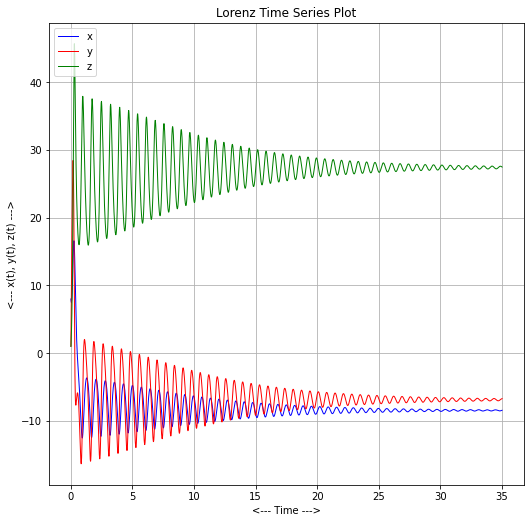

/tmp/ipykernel_13606/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


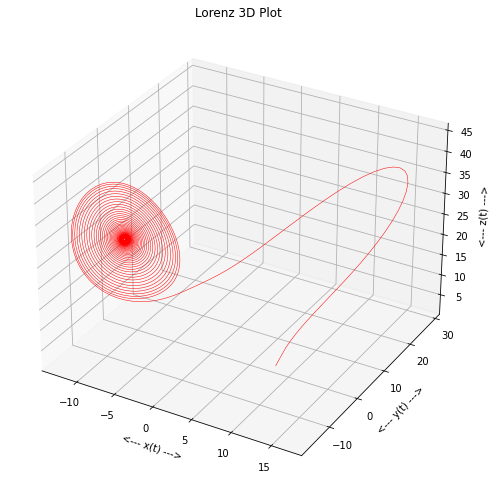

In [9]:
""" First: Dependence on sigma σ """
sigma = 5.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

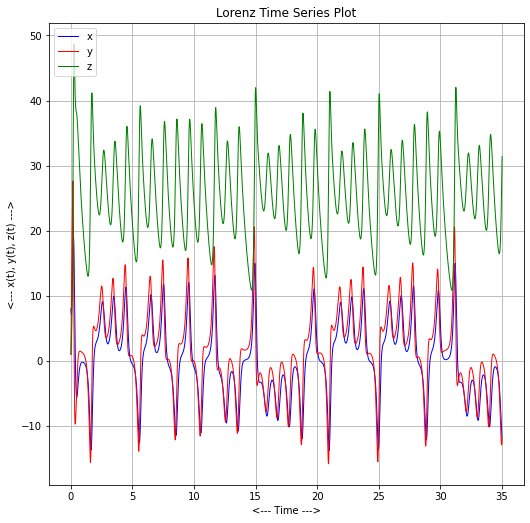

/tmp/ipykernel_13606/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


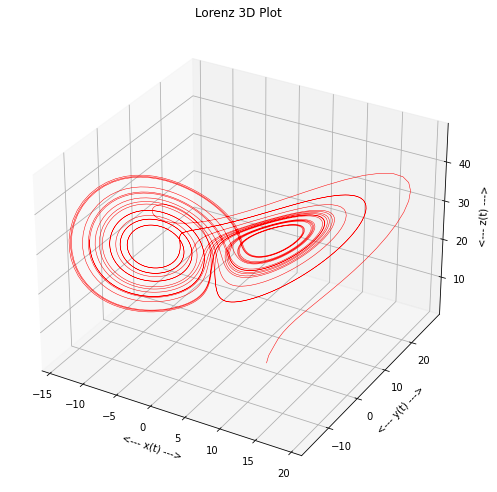

In [10]:
""" First: Dependence on beta β """ 
sigma = 10.0
beta = 4.0/3.0
rho = 28.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

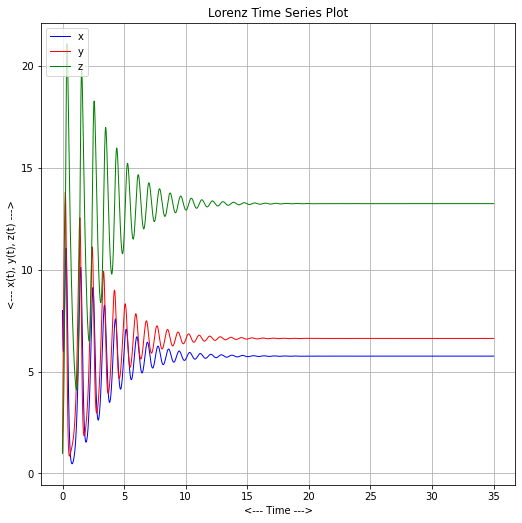

/tmp/ipykernel_13606/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


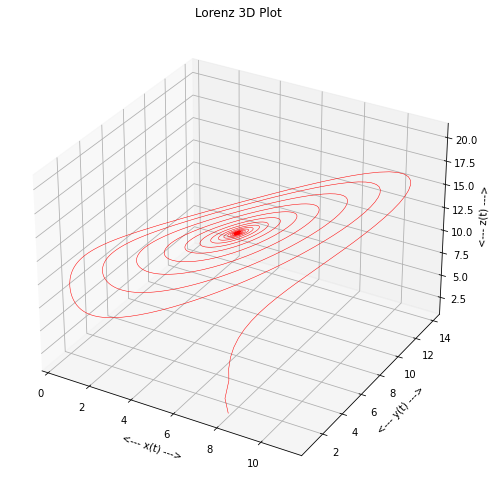

In [11]:
""" First: Dependence on rho ρ """ 
sigma = 10.0
beta = 8.0/3.0
rho = 14.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)